In [2]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

In [16]:
sdf = src.read_csv('../Data/results/sedov_blast_wave/initial.csv')
sdf.params={'mass':2.0/100}
sdf

,x,y,vx,vy,u,h,rho
0,-0.5,-0.5,0,0,0.0,0.01,1
1,-0.4,-0.5,0,0,0.0,0.01,1
2,-0.3,-0.5,0,0,0.0,0.01,1
3,-0.2,-0.5,0,0,0.0,0.01,1
4,-0.1,-0.5,0,0,0.0,0.01,1
...,...,...,...,...,...,...,...
95,0.0,0.4,0,0,0.0,0.01,1
96,0.1,0.4,0,0,0.0,0.01,1
97,0.2,0.4,0,0,0.0,0.01,1
98,0.3,0.4,0,0,0.0,0.01,1


<Axes: xlabel='x', ylabel='y'>

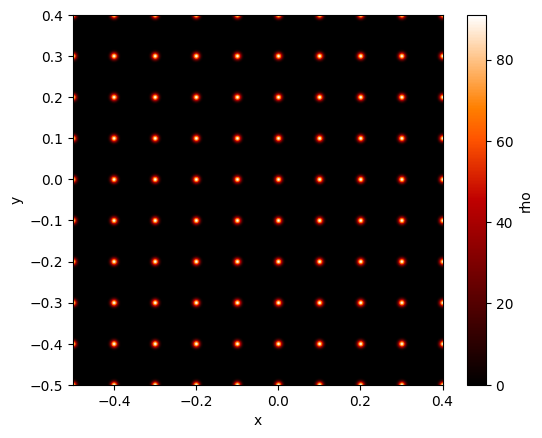

In [18]:
sdf.render('rho', xsec=1.0)